In [2]:
import pandas as pd
import MyLib.nlp as nlp
from MyLib.nlp import current_time as t
import MyLib.HTML_prep as HTML_prep
import MyLib.analysis as analysis 
import MyLib.hype as hype 
from ipywidgets import interactive, interact

%load_ext autoreload
%autoreload 2

def d(l):
    pd.set_option('display.max_colwidth', l)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Import Files & group by date


In [3]:
text_column="sentences"

#df=pd.read_json("2023-08-02_ChatGPT_Paragraphs_NLP-Out.json")
df=pd.read_json("2023-09-02GPT3_sentiment_metaphor_detection.json")

In [4]:
d(10)
df.head(4)

,key,url,filename,Uni,date,itemType,filepath,links,HTML,sentences,...,modal_word,modal_sentences,modal_n,tech_word,tech_sentences,tech_n,problem_word,problem_sentences,problem_n,sentiment
36158,KB9PEGPE,,dpia-z...,surf,2022-03-14,document,C:\Use...,[],False,https:...,...,None,None,0,None,None,0,None,None,0,neutral
42464,ALDWBD7G,,promis...,surf,2022-07-08,document,C:\Use...,[],False,https:...,...,None,None,0,None,None,0,None,None,0,neutral
42469,ALDWBD7G,,promis...,surf,2022-07-08,document,C:\Use...,[],False,https:...,...,None,None,0,None,None,0,None,None,0,neutral
47196,38A47Z3B,,surf-c...,surf,2018-10-16,document,C:\Use...,[],False,https:...,...,None,None,0,None,None,0,None,None,0,neutral


In [5]:
GROUP_key="Uni"

Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="key").value_counts(GROUP_key), 
                     text_column:df.value_counts(GROUP_key)})
Counts[text_column].describe()

count    15.000000
mean     2373.9...
std      5081.4...
min      339.00...
25%      572.50...
50%      1308.0...
75%      1494.0...
max      20660....
Name: sentences, dtype: float64

In [6]:
GROUP_key="Uni"

df.loc[:,"translated"]=0
df.loc[df.source_language!="en","translated"]=1

Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="key").value_counts(GROUP_key), 
                     text_column:df.value_counts(GROUP_key),
                     f"translated_{text_column}":df.groupby(GROUP_key)["translated"].sum(),
                     "translated_P":df.drop_duplicates(subset="key").groupby(GROUP_key)["translated"].sum()})

Counts["sentences_per_publ"]=Counts[text_column]/Counts["publications"]
Counts[f"share_translated_{text_column}"]=Counts[f"translated_{text_column}"]/Counts[text_column]
Counts["share_translated_P"]=Counts["translated_P"]/Counts["publications"]

Counts.sort_values("sentences_per_publ", ascending=False)

,publications,sentences,translated_sentences,translated_P,sentences_per_publ,share_translated_sentences,share_translated_P
Uni,,,,,,,
surf,41,20660,10455,27,503.90...,0.506050,0.658537
Tilburg University,21,1038,304,7,49.428571,0.292871,0.333333
Eindhoven University of Technoloy,35,1701,691,21,48.600000,0.406232,0.600000
Maastricht Univerisity,33,1565,209,13,47.424242,0.133546,0.393939
Vrije Universiteit Amsterdam,36,1682,229,6,46.722222,0.136147,0.166667
University of Amsterdam,31,1420,577,13,45.806452,0.406338,0.419355
Delft University,22,983,626,12,44.681818,0.636826,0.545455
Radboud Nijmegen,37,1421,720,18,38.405405,0.506685,0.486486
Wageningen University,9,339,103,3,37.666667,0.303835,0.333333


In [7]:
freq="M"
#df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")

df_publ=df.drop_duplicates(subset=text_column)[["date","key"]]
df_publ=df_publ.set_index("date").groupby(pd.Grouper(freq=freq)).count()
df_publ.columns=[text_column]
df_publ.tail()

,sentences
date,
2023-04-30,1548
2023-05-31,3881
2023-06-30,6315
2023-07-31,2630
2023-08-31,29


In [8]:
# Rebuild Fulltext Dataframe (if needed)

d(40)
df_P=pd.DataFrame({"text": df.groupby("key")[text_column].apply(' '.join)})
df_P[["NoStopwords","links"]]=df.groupby("key")[["NoStopwords","links"]].sum()
df_P=df_P.merge(df[["key","url","filepath","Uni","date","HTML"]],right_on="key",left_on="key",how="right").drop_duplicates("key")
df_P.head(4)

,key,text,NoStopwords,links,url,filepath,Uni,date,HTML
0,KB9PEGPE,https://edpb.europa.eu/system/files/...,[weiteredokumentevladekrechtsgutacht...,[],,C:\Users\mr\Zotero\storage\KB9PEGPE\...,surf,2022-03-14,False
1,ALDWBD7G,https://comproved.com/. https://www....,"[link, credit, author, question, num...",[],,C:\Users\mr\Zotero\storage\ALDWBD7G\...,surf,2022-07-08,False
3,38A47Z3B,https://qnamaker.ai. https://www.sub...,"[securityindexhtml, operatingsystem,...",[],,C:\Users\mr\Zotero\storage\38A47Z3B\...,surf,2018-10-16,False
13,8AWPG27Z,www.surf.nlwww.surf.nl/techtrends. #...,"[efficiency, netherlandseurope, eart...","[http://www.surf.nl, https://www.sur...",,C:\Users\mr\Zotero\storage\8AWPG27Z\...,surf,2023-05-08,False


# 2. Most common words

In [41]:

df["NoStopwords_Set"]=df.NoStopwords.apply(lambda x: list(x))
Lists=df.NoStopwords_Set.to_list()
len(Lists)

ic| 2678435260.py:1 in <module> at 17:28:08.406


35610

[('datum', 2819), ('ai', 2819), ('student', 2101), ('education', 2062), ('chatgpt', 1643), ('use', 1574), ('research', 1272), ('zoom', 1268), ('work', 1209), ('university', 1120), ('new', 1045), ('technology', 1001), ('information', 970), ('digital', 967), ('learn', 962), ('system', 931), ('model', 885), ('example', 885), ('learning', 881), ('user', 796)]


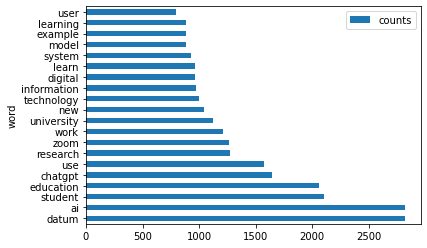

In [10]:
Lists=df.NoStopwords.to_list()

Lists=[i for i in Lists if i!=None]
Words=[item for sublist in Lists for item in sublist]

from collections import Counter
a_counter = Counter(Words)
most_common = a_counter.most_common(20)

print(most_common)#, most_common2)
pd.DataFrame.from_records(most_common,columns=["word","counts"],index="word").plot.barh()
pd.DataFrame(most_common,columns=["word","counts"]).to_excel("most_common_words.xlsx")

# Finding the most hyping universities, articles, and sentences

In [128]:
example.columns


Index(['key', 'url', 'filename', 'Uni', 'date', 'itemType', 'filepath',
       'links', 'HTML', 'sentences', 'LEN', 'letters_count', 'word_count',
       'source_language', 'original_text', 'pure_text', 'Lemmata',
       'NoStopwords', 'metaphors', 'metaphors_n', 'predictive_word',
       'predictive_sentences', 'predictive_n', 'imperative_word',
       'imperative_sentences', 'imperative_n', 'subjunctive_word',
       'subjunctive_sentences', 'subjunctive_n', 'hype_words_word',
       'hype_words_sentences', 'hype_words_n', 'mod_words_word',
       'mod_words_sentences', 'mod_words_n', 'hype_word', 'hype_sentences',
       'hype_n', 'modal_word', 'modal_sentences', 'modal_n', 'tech_word',
       'tech_sentences', 'tech_n', 'problem_word', 'problem_sentences',
       'problem_n', 'sentiment', 'translated', 'NoStopwords_Set', 'human_word',
       'human_sentences', 'human_n', 'fraud_word', 'fraud_sentences',
       'fraud_n'],
      dtype='object')

In [151]:
# 1. Select Wordlist: here - from my hype library module (see Miller et al.)

WordLists=["predictive", "imperative", "subjunctive", "hype", "modal", "tech", "problem", "human","fraud"] # Load from the hype module.

most_commons={}


for wordList in WordLists:
    wordlist=hype.WordListDict[wordList]
    df[wordList+"_word"]=df[text_column].apply(hype.hype_word,keys=wordlist)
    df[wordList+f"_{text_column}"]=df[text_column].apply(hype.hype_sentence,keys=wordlist)
    df[wordList+"_n"]=df[wordList+"_word"].apply(lambda x: len(x) if isinstance(x,list) else 0)

    most_commons[wordList]=df[wordList+"_word"].explode().dropna().value_counts()
    
    print(f"\n ---> {wordList} <--- \n")
    
    example=df[(df.word_count>12) & (df.word_count<20)].sort_values(wordList+"_n", ascending=False).head(2)
    example[[wordList+"_word",wordList+"_n"]]
    
    for i in example[wordList+f"_{text_column}"]:
        print(i)

df.head()

mod_words=df.filter(regex=f"_{text_column}", axis=1).dropna(how="all")
mod_words_n=df.filter(regex="_n", axis=1).dropna(how="all")

df[[i+"_n"for i in WordLists]].describe()


 ---> predictive <--- 

['121 / 144 institutions and students, consent can seldom be given freely.222 Employees and st udents may not be.']
['For automatic grading, feedback and annotation work, students will need to meet certain expectations that may not be clear.']

 ---> imperative <--- 

['Sometimes there is simply legislation that says how something should be done, and then we have to program it exactly that way.']
['API key which needs to match the project of the script.. let result =  DF.']

 ---> subjunctive <--- 

['We expect to have a good overview of what we want to know by 2027.']
['I believe that the result is still disappointing, which implies that I had higher expectations of it.']

 ---> hype <--- 

['Therefore, its exploration should include cultural values, expertise development, knowledge creation and most importantly understanding market developments.']
['Females re-offend at a significantly lower rate than expected, while males re-offend at a significantly higher 

,predictive_n,imperative_n,subjunctive_n,hype_n,modal_n,tech_n,problem_n,human_n,fraud_n
count,35610.000000,35610.000000,35610.000000,35610.000000,35610.000000,35610.000000,35610.000000,35610.000000,35610.000000
mean,0.174333,0.045128,0.030694,0.046897,0.250154,0.316316,0.091014,0.175541,0.019433
std,0.413474,0.212666,0.177147,0.224561,0.522235,0.641787,0.339240,0.449965,0.148433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.000000,3.000000,7.000000,10.000000,6.000000,5.000000,4.000000


In [152]:
df=df.sort_values(by="hype_n", ascending=True)

df2=df[(df.word_count>10) & (df.word_count<25)]

In [153]:
df_intersting=df[visible_columns].loc[\
                        (df["tech_n"]>=1) \
                      | (df["metaphors_n"]>=1) \
                      | (df["hype_n"]>=1) \
                      | (df["modal_n"]>=1)\
                      | (df["problem_n"]>=1)\
                      | (df["human_n"]>=1)\
                      | (df["fraud_n"]>=1)]

In [154]:
df_intersting.to_json("2023-09-05_intersting sentences.json")

In [113]:
len(df)
visible_columns=["fraud_word","human_word","problem_word","tech_word","metaphors","modal_word","sentences","Uni","sentiment"]
d(200)

In [134]:
tech=df[["key","sentences","tech_word","tech_n"]].reset_index()
tech.to_feather("2023-09-04_Tech_sentences.feather")

# Select & analyze sentences

In [172]:
df2[visible_columns].loc[\
                        (df["tech_n"]>=1) \
                      & (df["metaphors_n"]>=0) \
                      & (df["hype_n"]>=0) \
                      & (df["modal_n"]>=0)\
                      & (df["problem_n"]>=1)\
                      & (df["human_n"]>=0)\
                      & (df["fraud_n"]>=0)
                      & (df["sentiment"] != "neutral") \
                     ].head(20)

,fraud_word,human_word,problem_word,tech_word,metaphors,modal_word,sentences,Uni,sentiment
45512,None,None,"[copyright, bias]","[bias, model]",[],None,"As is often the case, those models are susceptible to bias, prejudice, and copyright issues.",surf,negative
20910,None,None,[threat],[model],"[threaten, model]",[can],"Again, this can democratise higher education and threaten its business model at the same time.",Maastricht Univerisity,negative
10939,None,None,[obsolete],[ChatGPT],"[rise, made, form]",None,"This year, the sudden rise of ChatGPT made this trusty form of assessment instantly obsolete.",Rotterdam University,negative
12931,None,None,[bias],[bias],[making],None,Being judged by biased AI in decision-making systems is not a mere theoretical scenario.,Vrije Universiteit Amsterdam,negative
26290,None,None,[hallucination],[ChatGPT],"[take, lead, bridge]",None,"Despite the hallucinations, ChatGPT and Microsoft take a lead that soon seems unbridgeable.",University of Amsterdam,positive
10192,[plagiarism],None,[plagiarism],[software],[],None,It is therefore not possible to check the authenticity of texts with plagiarism software.,Utrecht University,negative
35813,None,None,[privacy],[generate],"[generated, lot]",None,"In the spring of 2020, Zoom generated a lot of negative publicity about privacy and.",surf,negative
12562,None,None,[abuse],[technology],[susceptible],None,“This technology is highly susceptible to abuse by self-interested parties or those with malicious intent.,Vrije Universiteit Amsterdam,negative
6681,None,[teacher],[replace],[Chatbot],"[replaced, bot]","[will, fear]",Just like the fear that we as teachers will just be replaced by an AI chatbot.,OpenUniversiteitNederland,negative
9586,None,None,"[bias, problem]",[bias],[reproduce],[can],One problem is that they can reproduce stereotyping and thus perpetuate bias.,Utrecht University,negative


<AxesSubplot: title={'center': 'sentiment per Uni'}, ylabel='Uni'>

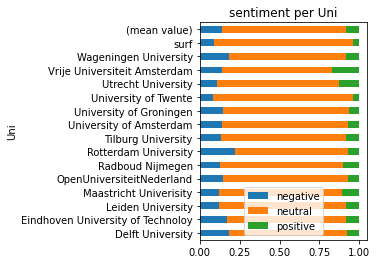

In [138]:
df_pivot = pd.pivot_table(df, index='Uni', columns=['sentiment'],values="sentences",
                          aggfunc='count')

def average_sentiment(columns):
    
    positive=columns[0]
    neutral=columns[1]
    negative=columns[2]
    total=positive+negative+neutral
    
    result=[negative/total,neutral/total,positive/total]
    
    return pd.Series(result)

columns=["positive","neutral","negative"]

sent=df_pivot.apply(average_sentiment, axis=1)

# add mean value
sent.loc['(mean value)'] = sent.mean()
sent.columns=["negative","neutral","positive"]

sent.plot.barh(stacked=True,title="sentiment per Uni",figsize=(3,4))

# Adding the columns for sentiment & metaphors

In [ ]:
##THIS TAKES TIME!! ###

from tqdm import tqdm
tqdm.pandas()

df["metaphors"] = df.progress_apply(nlp.classify_metaphors, axis=1,column=text_column)
df["metaphors_n"] = df.metaphors.apply(lambda x: len(x))

df["sentiment"] = df.progress_apply(nlp.roberta_sentiment, axis=1,column=text_column)
df[df["sentiment"]=="negative"][text_column]

In [ ]:
df.to_json(analysis.Today+"GPT3_sentiment_metaphor_detection.json")

# Creating subsets

In [139]:
df.head()
#df.columns
mod_words=df[df['mod_words_n']>0]

In [140]:
df2=df.loc[mod_words_n.index,["key","Uni","date",text_column,"NoStopwords","filepath"]].join(mod_words_n)
df2.head(2)


,key,Uni,date,sentences,NoStopwords,filepath,metaphors_n,predictive_n,imperative_n,subjunctive_n,hype_words_n,mod_words_n,hype_n,modal_n,tech_n,problem_n,human_n,fraud_n
36158,KB9PEGPE,surf,2022-03-14 00:00:00,https://edpb.europa.eu/system/files/2021-.,[],C:\Users\mr\Zotero\storage\KB9PEGPE\dpia-zoom-25-february-2022_0.pdf,0,0,0,0,0,0,0,0,0,0,0,0
25225,4L3YLFBU,University of Amsterdam,2023-05-04 08:27:57,We aim to find a common language as a first step towards establishing interdisciplinary collaboration..,"[aim, find, common, language, step, establish, interdisciplinary, collaboration]",C:\Users\mr\Zotero\storage\4L3YLFBU\creativity-and-ai-in-cinema-hybrid.html,4,0,0,1,0,1,0,1,0,0,0,0


In [ ]:
df2.to_json(analysis.Today+"GPT3_Subset_predictive.json")

In [ ]:
df.columns

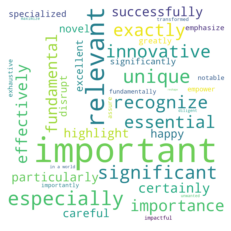

In [161]:
Key_column="hype"

WordList=df[f"{Key_column}_word"].explode().dropna().to_list()
#WordList
analysis.make_wordcloud(WordList,filename=f"{Key_column}",file_ending="jpg")

In [ ]:
W_P=[i[0] for i in Counter(WordList_P).most_common(100)]
W_N=[i[0] for i in Counter(WordList_N).most_common(100)]


set(W_P)-set(W_N)


In [164]:
WordLists

['predictive',
 'imperative',
 'subjunctive',
 'hype',
 'modal',
 'tech',
 'problem',
 'human',
 'fraud']

predictive


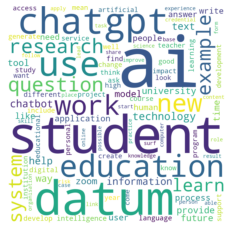

imperative


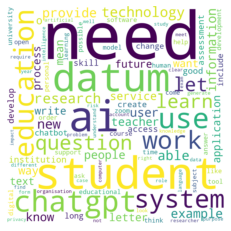

subjunctive


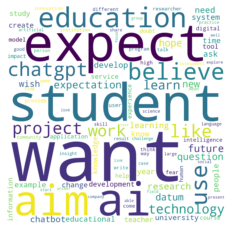

hype


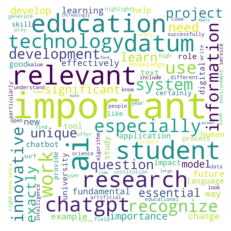

modal


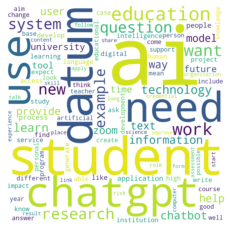

tech


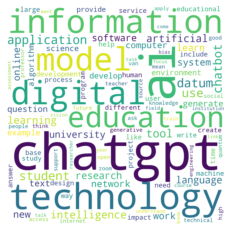

problem


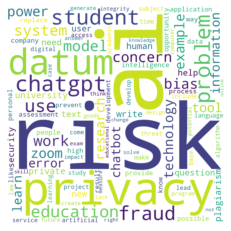

human


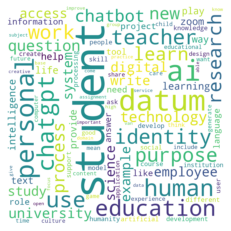

fraud


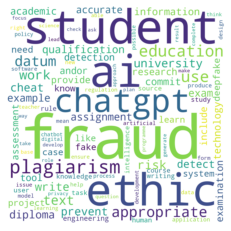

In [167]:
#imp_words=df[df['problem_n']>0]
for word in WordLists:
    print(word)
    imp_words=df[df[f'{word}_n']>0]

    WordList=imp_words.NoStopwords.to_list()
    WordList=analysis.flat(WordList)
    #WordList
    analysis.make_wordcloud(WordList,filename=f"WordCloud_{word}_co_words",file_ending="jpg")
    Counter(WordList).most_common(10)

In [ ]:
pd.DataFrame(Counter(WordList).most_common(500),columns=["word","counts"]).to_excel("positive_context.xlsx")

In [ ]:
df.set_index("date").groupby(pd.Grouper(freq=freq))["predictive_n"].apply(lambda x: sum(x) if len(x)>0 else 0)

In [ ]:
#WordLists.append("metaphors")
WordLists=['predictive',
 'imperative',
 'subjunctive',
 'hype_words',
 'mod_words',
 'metaphors',"ChatGPT_words"]
WordLists

In [ ]:
def sentiment_time(x):
    pos=sum(x=="positive")
    neg=sum(x=="negative")
    neu=sum(x=="neutral")
    total=pos+neg+neu
    rel_sent=(pos-neg)/(neu+0.000001)
    return rel_sent

hype_time=df.set_index("date").groupby(pd.Grouper(freq=freq))

timerows["sentiment"]=hype_time["sentiment"].apply(sentiment_time)
timerows["sentiment"][timerows.index>pd.Timestamp("2022-1-1")].plot()


In [ ]:
## Generate Timerows
print(freq)

hype_time=df.set_index("date").groupby(pd.Grouper(freq=freq))

timerows=df_publ
WordLists=list(set(WordLists+["metaphors"]))

for l in WordLists:
    print(l,end=" ")
    timerows[l]=hype_time[l+"_n"].apply(lambda x: sum(x) if len(x)>0 else 0)
    
timerows[[text_column,"hype","modal","tech","problem","metaphors"]][timerows.index>pd.Timestamp("2022-1-1")].plot()

#secondary_y=True
timerows[["predictive","imperative","subjunctive"]][timerows.index>pd.Timestamp("2022-1-1")].plot()

In [ ]:
timerows.fillna(0.000)
for c in timerows.columns[1:]:
    print(c)
    timerows[c+"-rel"]=timerows[text_column]/timerows[c].fillna(0)

In [ ]:
timerows[["hype-rel","modal-rel","tech-rel","problem-rel","metaphors-rel"]][timerows.index>pd.Timestamp(2022,1,1)].fillna(0).plot()
timerows[["predictive-rel","imperative-rel","subjunctive-rel"]][timerows.index>pd.Timestamp(2022,1,1)].fillna(0).plot()

In [ ]:
HypeMax=timerows[timerows["hype"]==timerows["hype"].max()]

HypeMaxDateTime=HypeMax.index[0]
HypeMax

In [ ]:
# DateOffset adds days
df[df.date>=HypeMax.index[0]][df.date<=HypeMaxDateTime+ pd.DateOffset(7)].filepath.drop_duplicates()

# Named entity recognition of hype / mod sentences

- PERSON:      People, including fictional.
- NORP:        Nationalities or religious or political groups.
- FAC:         Buildings, airports, highways, bridges, etc.
- ORG:         Companies, agencies, institutions, etc.
- GPE:         Countries, cities, states.
- LOC:         Non-GPE locations, mountain ranges, bodies of water.
- PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
- EVENT:       Named hurricanes, battles, wars, sports events, etc.
- WORK_OF_ART: Titles of books, songs, etc.
- LAW:         Named documents made into laws.
- LANGUAGE:    Any named language.
- DATE:        Absolute or relative dates or periods.
- TIME:        Times smaller than a day.
- PERCENT:     Percentage, including ”%“.
- MONEY:       Monetary values, including unit.
- QUANTITY:    Measurements, as of weight or distance.
- ORDINAL:     “first”, “second”, etc.
- CARDINAL:    Numerals that do not fall under another type.

In [ ]:
d(150)

example=df.dropna(subset=f"mod_words_{text_column}").sort_values("hype_words_n", ascending=False)
example=example.loc[example.hype_words_n>5,["hype_words_n",text_column,"filepath"]] # minimum 1 hypeword
print(len(example))
example.to_csv("2023-08-03_hype_paragraphs.csv")
example.head()


In [ ]:
text=example[text_column].to_list()[0].split(". ")[-9]

print(text)
x=sentiment_A(text)

In [17]:
### NEW NER

# Use a pipeline as a high-level helper
from transformers import pipeline

NER_pipe = pipeline("token-classification", model="dslim/bert-base-NER")



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
result = pipe(text)

In [ ]:

def bert_NER(row, column="text_clean",pipe=NER_pipe):
    text = row[column]
    result = pipe(text)
    sentiment=[i["label"] for i in result][0]
    return sentiment




In [ ]:
len(" ".join(example.paragraphs.to_list()).split(" "))

In [ ]:
import spacy
import spacy_transformers
from thinc.api import set_gpu_allocator, require_gpu
NER = spacy.load("en_core_web_trf") # thanks to Martin L. for advising me on this.

RAW_text=" ".join(example[text_column].to_list())

# THIS Takes long
t()
NER_text=NER(RAW_text)
t()
##

Orgs=[word.text for word in NER_text.ents if word.label_=="ORG"]
Persons=[word.text for word in NER_text.ents if word.label_=="PERSON"]
Law=[word.text for word in NER_text.ents if word.label_=="LAW"]
Event=[word.text for word in NER_text.ents if word.label_=="EVENT"] # ART , WORK_OF_ART

from collections import Counter
Counter(Orgs).most_common(10)
n,c=zip(*(Counter(Orgs).most_common(10)))

n

In [ ]:
Counter(Orgs).most_common(20)

In [ ]:
## Sentences with Hypewords & Organisations by dict.
from collections import defaultdict
Orgs_dict=defaultdict(list)
{Orgs_dict[word.text].append(word.sent) for word in NER_text.ents if word.label_=="ORG"}
Orgs_dict={k:list(set(v)) for k, v in Orgs_dict.items()}

Orgs_dict[n[0]][:2]

In [ ]:
Organizations=pd.DataFrame(Counter(Orgs).most_common(1000))
Organizations.columns=["name","counts"]
Organizations.to_json("2023-08-02_Organisations.json")
organisations=Organizations.name.to_list()


In [ ]:
#df.pure_text.apply(hype.hype_sentence,keys=[" een "]).dropna()

In [ ]:
Organizations=pd.read_json("2023-08-01_Organisations.json")

In [ ]:
Organizations[:20].plot.barh(x="name")


In [ ]:
# Manually improve the NER (lists not updated for the transformer)
manually_added_organisations=["Centre for Language and Speech Technology","Computational Linguistics Group","Leiden Law Park","ICRES","GRN","CLST","AiPact" , "AI MAPS" , "ALGOSOC Opens","MAGPIE Opens"]
Non_organisations=["ation","Ion","IS","state","the Netherlands","gather","NL","Conference","risico","Covid"]
AI_terms=["ict","LLM","data","GPT","ChatGPT","chatGPT","Deep Learning","GPT-3","AI in education","Generative AI","Chat GPT"]
Uni_terms=["Edu","Education","Univers","Faculty","the Faculty of","Board","University","PhD","the Faculty of Science","Education and"]

organisations=list(set(organisations+manually_added_organisations)-set(Non_organisations+AI_terms+Uni_terms))

organisations=[i.replace("the ","") for i in organisations]

In [ ]:
# finding Orgas in sentences

Orks=df[["Uni",text_column]]
Orks.loc[:,["organisations"]]=Orks[text_column].apply(hype.keyword_return,keys=organisations)

Orks=Orks.explode("organisations").loc[Orks.organisations.dropna().index,["Uni","organisations"]]

Orks.value_counts()[:10]

In [ ]:
import networkx as nx
G = nx.DiGraph()
TuppleList=list(Orks.dropna().itertuples(index=False, name=None))
G.add_edges_from(TuppleList, source="Uni", target="organisations")
#G2=analysis.CleanGraph(G,removeIsolates=True,minDegree=2,only_largest_component=False)
nx.write_gexf(G,"Organisations.gexf")

Centrality=pd.DataFrame(nx.in_degree_centrality(G), index=[0]).T.sort_values(by=0,ascending=False)
Centrality.columns=["in_degree_centrality"]
Uni_terms=["Humanities","Levels","the Faculty of Science","Board of Examiners","the Board of Examiners","Executive Board","Examination Board","Electrical Engineering, Mathematics","Studium Generale","Council","PHD","the Examinations Board"]

Centrality.head(15).plot.barh(figsize=(3,5))

# Word dependency

In [ ]:
subjects=[]
subjects2=[]
objects=[]
verbs=[]
verbs2=[]
for token in NER_text:
    if token.dep_=="nsubj":
        subjects.append(token.lemma_)
        subjects2.append(", ".join([child.lemma_ for child in token.children])+" "+token.lemma_)
        
    if token.dep_=="pobj" or token.dep_=="dobj":
        objects.append(token.text)
        
    if token.dep_=="ROOT":
        verbs.append(token.text)
        SUB="education"
        if SUB in [child.lemma_ for child in token.children]:
            subj=" ".join([child.lemma_ for child in token.children if child.lemma_==SUB])
            obj=", ".join([child.text for child in token.children if child.dep_=="pobj" or child.dep_=="dobj"])
            obj=", ".join([child.text for child in token.children if child])

            verbs2.append(subj+ " " +token.text + " " + obj)    

from collections import Counter
A=Counter(subjects2).most_common(20)

B=Counter(objects).most_common(20)

C=Counter(verbs).most_common(20)
print(A)
print(B)
print(C)

In [ ]:
#wordcontext of education

for token in NER_text[:1000]:
    if token.text=="education":
        print("\n",token.text)
        print(token.sent)

In [ ]:
Counter(verbs2).most_common(15)

In [ ]:
Subjects=[i for i in subjects2]
a,b=zip(*Counter(subjects).most_common(20))

from matplotlib import pyplot as plt
plt.title("most common subjects")
plt.barh(a, b)


# Hype-word & Mod-word statistics per university

In [ ]:
Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="key").value_counts("Uni"), 
                     text_column:df.value_counts("Uni"),
                    "mod_words":df.groupby("Uni")["mod_words_n"].sum()})

Counts["mean mod-words"]=Counts["mod_words"]/Counts[text_column]

Counts.sort_values("mean mod-words", ascending=False)

In [ ]:
Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="key").value_counts("Uni"), 
                     text_column:df.value_counts("Uni"),
                    "hype_words":df.groupby("Uni")["hype_words_n"].sum()})

Counts["mean hype_words"]=Counts["hype_words"]/Counts[text_column]
Counts.sort_values("mean hype_words", ascending=False)

# Does translation increase the share of hype words? // Is Dutch more hyping?

In [ ]:
pd.set_option('display.max_colwidth', 300)

df.loc[df.Uni=="surf",[text_column]].head(10)

# Use of words over time

In [ ]:
from collections import Counter


keyWords="chatgpt,education,chatbot,university,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"
keyWords="education,chatbot,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"

keyWords=keyWords.split(",")
print(keyWords)

group=df.set_index("date").groupby(pd.Grouper(freq='M'))["NoStopwords"].sum()

Wordyear={}
Wordyear_number={}
Wordyear_only={}

for i, row in group.items():
    
    #print(i,row)
    if type(row)==list:
        
        ## filter ROW for interesting key-words:
        row=[i for i in row if i in keyWords]
        
        c=Counter(row).most_common(5)
        
      #  c_exact=[(i[0],i[1]/len(group)) for i in c]
        
        
        
        c_number=[(i[0],round(int(i[1])/len(row),2)) for i in c]
        
        # Counter results in percent.
        c=[(i[0],str(round(i[1]/len(row)*100,2))+"%") for i in c]
        

        c_only=[i[0] for i in c]


        Wordyear[str(i)]=c
        Wordyear_number[str(i)]=c_number
        Wordyear_only[str(i)]=c_only
        
        
        
    #print(c,"\n")
    
CountDF=pd.DataFrame.from_dict(Wordyear, orient='index').T


CountDF.T[CountDF.T.index>"2022-06-01"]

In [ ]:
CountDF=pd.DataFrame.from_dict(Wordyear_only, orient='index').T
CountDF.T[CountDF.T.index>"2022-10-01"]

# Words in context & Word-Graph analysis

In [ ]:
SearchTerm="Google" 
Result=df[df["sentences"].apply(lambda x: SearchTerm in x)]["sentences"]
d(5000)
Result.head(5)

In [ ]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="education",words_before=(0,10),words_after=(0,10))
def text_context(column=["NoStopwords","sentences"],search_word="education",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),n_examples=1000,context=(words_before,words_after))


In [ ]:
# WORD _GRAPH ANALYSIS

G=analysis.Word_NetworkGen(df,n=500,column="NoStopwords")
G2=analysis.CleanGraph(G,removeIsolates=True,minDegree=2,only_largest_component=True)
#G2=G
analysis.writeNetworkHTML(G2,view=False)
print("see the network: The_network.html")

In [ ]:
import networkx as nx
nx.write_gexf(G, "NoStopwords.gexf")

Centrality=pd.DataFrame(nx.closeness_centrality(G), index=[0]).T.sort_values(by=0,ascending=False)

Centrality.columns=["closeness-Centrality_per_sentence"]
Centrality.head(10)

# Link Analysis 

In [ ]:
df.columns

In [ ]:
import networkx as nx

#df=pd.read_json("2023-02-06_Zotero_AI_nlp_en2.json")
links=df[["url","links"]].drop_duplicates(subset="url").explode("links")

In [ ]:
def domain_From_url(url):
    if isinstance(url,str):
        domain=url.replace("https://","").replace("http://","").replace("www.","").split("/")[0].lstrip(".")
        domain=domain.rsplit("@",1)[-1].rsplit("%20",1)[-1]
        if domain.count(".")>1:
            domain=".".join(domain.rsplit(".",2)[-2:])

        if "." in domain:
            return domain
    
links["source"]=links.url.apply(domain_From_url)
links["target"]=links.links.apply(domain_From_url).reindex()

In [ ]:
edgelist

In [ ]:
links=links.dropna(subset="target").dropna(subset="source")
#links=links[~links["url"].apply(lambda x: "linkedin.com" in x)]
edgelist=(zip(links["source"], links["target"]))

links[links["source"]==None]
G = nx.from_edgelist(edgelist)
nx.write_gexf(G,"Links.gexf")
Link_Centrality=pd.DataFrame(nx.closeness_centrality(G),index=[0]).T.sort_values(ascending=False, by=0)
Link_Centrality.columns=["Centrality"]
Link_Centrality.head(10)

In [ ]:
edgelist=(zip(links["source"], links["target"]))
edges=list(edgelist)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(edges).most_common(15))

In [ ]:
[i for i in links if "michelklein.nl" in i]

In [ ]:
links=df.links.to_list()
links=[list(set(l))for l in links if type(l)==list]
links=[i for s in links for i in s if i!=None]
domains=[domain_From_url(i) for s in links for i in s if i!=None]

In [ ]:

from collections import Counter
a_counter = Counter(links)
most_common = a_counter.most_common(15)
most_common

In [ ]:
links=df.linkUrl.to_list()